# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [141]:
# Import the appropriate libraries with aliases
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import seaborn as sns

# Create two new dataframes
north_df = pd.read_csv(r'NorthCallCenter.csv')
south_df = pd.read_csv(r'SouthCallCenter.csv')
north_df
# south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [5]:
# EDA Question 1A solution below:
north_df.value_counts('Rep ID').count() 

# north_df.value_counts('Rep ID') gives me the indivual reps of the north , then .count() counts those values to give me the final rep number
# 9 reps

np.int64(9)

#### EDA Question 1B:  How many reps are in the South branch?  

In [6]:
# EDA Question 1B solution Below:
south_df.value_counts('Rep ID').count()

# south_df.value_counts('Rep ID') gives me the indivual reps of the south tower, then .count() counts those values to give me the final rep number
#11 reps

np.int64(11)

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [10]:
# EDA Question 2A solution Below:
north_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean().round(2)

# After selecting all the wanted columnns from the north dataframe, I can use .mean() to find
# the avergae for all columns selected.

Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [9]:
# EDA Question 2B solution Below:
south_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean().round(2)
# After selecting all the wanted columnns from the south dataframe, I can use .mean() to find
# the avergae for all columns selected.

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [6]:
# EDA Question 3 solution Below:
# north_df.value_counts('Time Block') + south_df.value_counts('Time Block')
pd.concat([north_df,south_df]).value_counts('Time Block')
# I added both dataframes together using .value_counts('Time Block')

##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91 
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97 
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 23
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [138]:
# Question 1 solution below
# north_df.isna().sum()
fill_north = north_df.fillna(0)
# south_df.isna().sum()
fill_south = south_df.fillna(0)

#### Record your answer below:

> Your Answer:Yes, both dataframes have missing data but only in the incoming wait time column. This is presumably because there wasnt a wait at all, so if thats the case I would leave the data be or convert all the nulls to 0.0s.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [129]:
# Cleaning Question 2 solution below:
# Cleaning Question 2 solution below:
north_df.loc[north_df['Sale'] == 'YES '] = 'YES'


C:\Users\Jacob\AppData\Local\Temp\ipykernel_14064\213608193.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'YES' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  north_df.loc[north_df['Sale'] == 'YES '] = 'YES'
C:\Users\Jacob\AppData\Local\Temp\ipykernel_14064\213608193.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'YES' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  north_df.loc[north_df['Sale'] == 'YES '] = 'YES'
C:\Users\Jacob\AppData\Local\Temp\ipykernel_14064\213608193.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'YES' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  north_df.loc[north_df['Sale'] == 'Y

In [130]:
north_df.value_counts('Sale')

Sale
NO     234
YES     11
Name: count, dtype: int64

##### Record your answer by below:
> Your Answer: I rectified this issue because it could lead to inaccurate data if you needed to count the amount of sales that occured. I forced any 'YES ' values to be converted into the exact same YES value to format everything. The whitespace is what caused this value to be different. However in a situation that has many more unique values, you might want to use a version of .str.strip() to handle the issue.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [120]:
# Cleaning Question 3 solution below:
# south_df.duplicated().value_counts()
north_df = north_df.loc[~north_df.duplicated(subset = ['Branch','Time Block','Incoming or Outgoing','Rep ID','Sale','Lost Call','Busy Minutes'])] \
.reset_index(drop=True).copy()

north_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


##### Record your answer below:
> Your Answer: The south tower dataframe had no duplicate rows, however the north tower dataframe did. I used .duplicated to find the duplicated rows then selected everything that wasnt a duplicate and set the new dataframe as the normal north_df. I then reset the index to maintain correct index numbreing.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [104]:
# Cleaning Question 4 solution below:
cleaned_north = north_df.drop(['Unnamed: 0'], axis = 'columns')
cleaned_south = south_df.drop(['Unnamed: 0'], axis = 'columns')

##### Record your answer below:
> Your Answer: Other than the Unnamed: 0 column thats generated when reading the csvs when not setting index to false, I feel all other info would be relavent to the business question of possibly hiring more reps. I dropped the unammed column using the .drop() method.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [145]:
# Create dataframe for the entire company named df
df = pd.concat([north_df,north_df])
# I used the merge function to combine the north and south dataframes into one.
df


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [14]:
# Manipulation Question solution below:
grouped_df = df.groupby('Rep ID').sum()
grouped_df[['Calls','Branch']].sort_values(by='Calls', ascending = False)

,Calls,Branch
Rep ID,,
Brent,37,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...
Eric,35,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...
Randy,33,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...
Sandy,32,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...
Helga,31,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...
Lilly,30,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...
George,29,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...
Kate,29,SouthSouthSouthSouthSouthSouthSouthSouthSouthS...
Todd,29,NorthNorthNorthNorthNorthNorthNorthNorthNorthN...


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37
- South Branch = Eric, 35

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [19]:
# Manipulation Question 2 solution below:
def abandon_percent(x):
    north_sum_counts = x['Abandoned'].value_counts()
    north_aban_ave = north_sum_counts[1] / north_sum_counts[0] * 100
    print(north_aban_ave.round(decimals = 2))
    
abandon_percent(north_df)
abandon_percent(south_df)
abandon_percent(df)

2.94
1.29
2.94


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.94%
- South Branch = 1.29%
- Company Wide = 2.01%
- Do any of these fall out of the optimal range of 2-5%?

No, everything remains withtin the 2-5% range, however the north Branch has a significantly higher abandonment rate over the south tower.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [32]:
# Manipulation Question 3 solution below:
def under_2(x):
    under_2 = 0
    if x <= 2:
       under_2 += 1
    return under_2
# created a funciton to search for anything over and equal to 3 seconds.
def over_2(x):
    over_2 = 0
    if x >= 3:
        over_2 += 1
    return over_2
# created a function to combine the above funtions and print out the results of the mathmatical results.
def percent_time(x):
    ideal_time = x['Incoming Wait Time'].apply(under_2).sum()
    over_ideal_time = x['Incoming Wait Time'].apply(over_2).sum()
    print(ideal_time)
    print(over_ideal_time)
    time_percent = ideal_time / over_ideal_time * 100 
    print(f'The percentage of calls over 2 seconds is {time_percent.round(2)}%')
# called the above function                                                                        
percent_time(north_df)
percent_time(south_df)
percent_time(df)

33
49
The percentage of calls over 2 seconds is 67.35%
48
78
The percentage of calls over 2 seconds is 61.54%
66
98
The percentage of calls over 2 seconds is 67.35%


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%, 33
- South Branch = 38.10%, 48
- Company Wide = 38.94%, 81

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [23]:
# Manipulation Question 4 solution below:
north_answer_speed = north_df['Incoming Wait Time'].mean()
print(north_answer_speed.round(2))

south_answer_speed = south_df['Incoming Wait Time'].mean()
print(south_answer_speed.round(2))

total_answer_speed = df['Incoming Wait Time'].mean()
print(total_answer_speed.round(2))

3.05
3.0
3.05


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.05

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

In [ ]:
north_df

In [147]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as sns
# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:
sns.set_style('whitegrid')
sns.barplot(data=abandonment_rates,palette='YlGnBu')
plt.title("Average Abandonment Rate Per Queue")
plt.ylabel('Abandonment Rate(%)')
plt.xlabel('Queue')
plt.show()

C:\Users\Jacob\AppData\Local\Temp\ipykernel_14064\619227167.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


IndexError: index 2 is out of bounds for axis 0 with size 2

TypeError: float() argument must be a string or a real number, not 'dict'

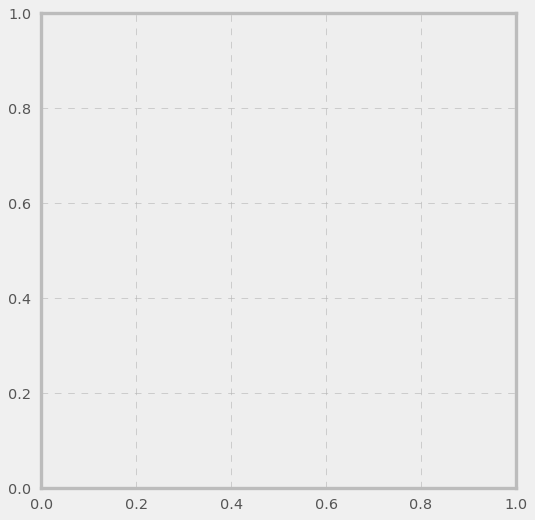

In [140]:
fig, ax=plt.subplots()
ax.pie(abandonment_rates,labels=queues)

##### Record your answer below:

> Chart style you chose and why: 

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

In [35]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
# north_plt.round(1)
# quick_stats
# total_stats
# service_level.round(1)


In [36]:
final_table = pd.merge(north_plt.round(1),service_level.round(1), on='Rep ID')
final_table = final_table.drop(columns=['Calls_x','Calls_y'])

In [42]:
final_table.groupby('Rep ID').sum()

,Incoming Wait Time,Service Level %
Rep ID,,
Amanda,2.4,60.0
Andy,3.6,30.0
Brent,2.1,75.0
Cam,2.9,45.5
Duke,2.8,42.9
Joe,3.6,20.0
Lilly,3.1,33.3
Todd,3.5,33.3
Xander,3.3,33.3


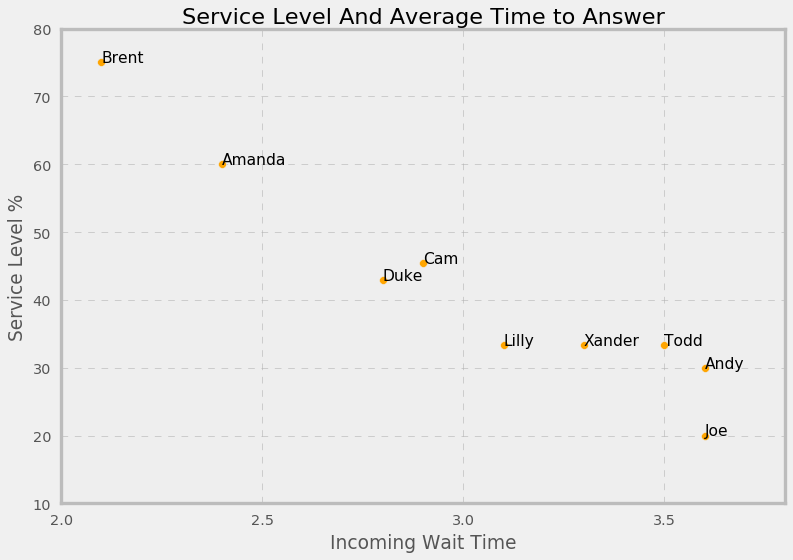

In [71]:
final_table.plot(kind='scatter',
                 y='Service Level %',
                 x='Incoming Wait Time',
                 title='Service Level And Average Time to Answer',
                 c='orange',
                 s=50
                 )
for i, txt in enumerate(final_table['Rep ID']):
    plt.annotate(txt,(final_table['Incoming Wait Time'][i], final_table['Service Level %'][i]))
    
plt.style.use('bmh')


In [77]:
final_table.groupby('Rep ID').sum()

,Incoming Wait Time,Service Level %
Rep ID,,
Amanda,2.4,60.0
Andy,3.6,30.0
Brent,2.1,75.0
Cam,2.9,45.5
Duke,2.8,42.9
Joe,3.6,20.0
Lilly,3.1,33.3
Todd,3.5,33.3
Xander,3.3,33.3


<Axes: xlabel='Rep ID', ylabel='Service Level %'>

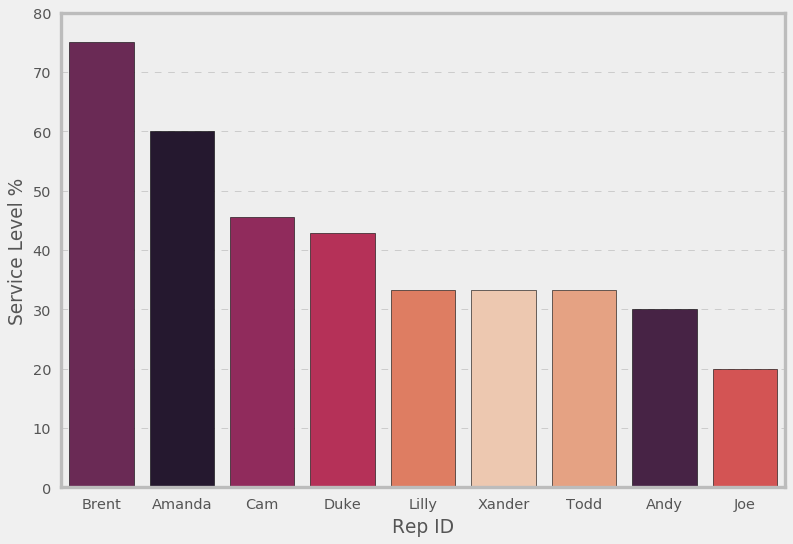

In [109]:

sns.barplot(data=final_table.groupby('Rep ID').sum(),
            x='Rep ID'
            ,y='Service Level %',
            hue = 'Rep ID',
            edgecolor='black',
            palette='rocket',
            order=final_table.sort_values(by='Service Level %', ascending = False)['Rep ID']
           )

In [50]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


##### Record your answer below:

> Chart style you chose and why:
> I chose a scatter plot to easily show which rep is doing best when it comes to service level and incoming wait time. I added a bar chart to
> show only the service level comparison between all the reps more clearly.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


<Axes: title={'center': 'Incoming and Outgoing Calls For Each Purpose'}, ylabel='Number of Calls'>

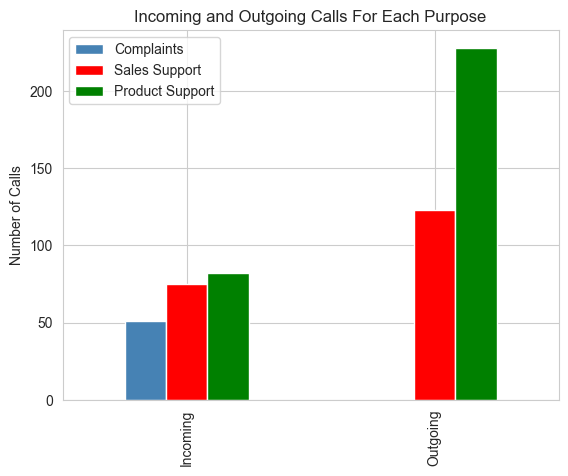

In [93]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
data = {'Complaints':complaints,'Sales Support':sales_support,'Product Support':product_support}
new_df = pd.DataFrame(data)
new_df.plot(kind='bar',
            title='Incoming and Outgoing Calls For Each Purpose',
            color=['steelblue','red','green'],
            ylabel='Number of Calls')

##### Record your answer below:

> Chart style you chose and why:
> I chose a grouped bar chart because it shows distinctivly the purpose of the incoming and outgoing calls side by side to make the comparison easy to
> recognize.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [4]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

NameError: name 'df' is not defined